In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip


In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
df=pd.read_csv('/kaggle/input/quora-question-pairs/train.csv.zip')

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
16128,16128,30763,30764,Why would Disney want to buy Twitter?,Should Disney acquire Twitter?,1
81667,81667,138625,22281,How can I discover who owns a Gmail account?,I set up 2-Step Verification. I don't have acc...,0
366216,366216,299304,496392,How much does it cost to giving birth in USA f...,How much does it typically cost to give birth ...,0
362860,362860,492801,492802,How did you know you were gay?,How do you know if you're a lesbian?,0
69084,69084,119267,119268,Which are smartphones which are non chinese br...,Are there any smartphones not made in china?,0
230208,230208,64677,339687,What are the similarities and differences betw...,What are the similarities and differences betw...,1
74321,74321,127390,127391,What could be the best options to spend time f...,I am in State Board first year and want to sco...,0
21863,21863,41105,41106,Can a final year appearing candidate apply for...,Can pre-final year engineering students appear...,0
215820,215820,235045,25977,How can I know my wife has had an affair?,How do I know if my wife cheats?,1
126356,126356,203669,203670,What is the best medical site?,What are the best medical forum sites?,1


In [6]:
df.shape

(404290, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [10]:
# missing value
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [11]:
# duplicate row
df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

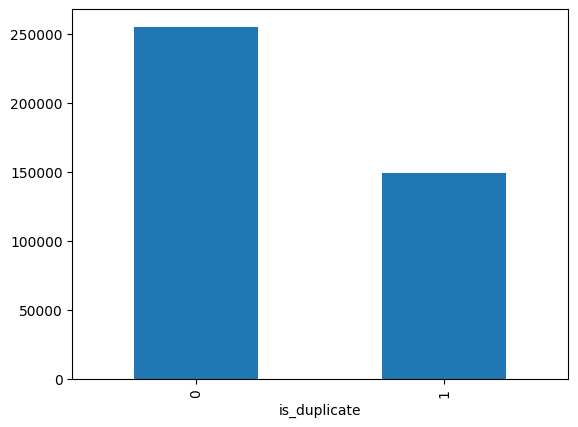

In [12]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [15]:
# repeated questions
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('number of unique question',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of getting repeated',x[x].shape[0])

number of unique question 537933
Number of getting repeated 111780


In [16]:
qid

0              1
1              3
2              5
3              7
4              9
           ...  
808575    379845
808576    155606
808577    537929
808578    537931
808579    537933
Length: 808580, dtype: int64

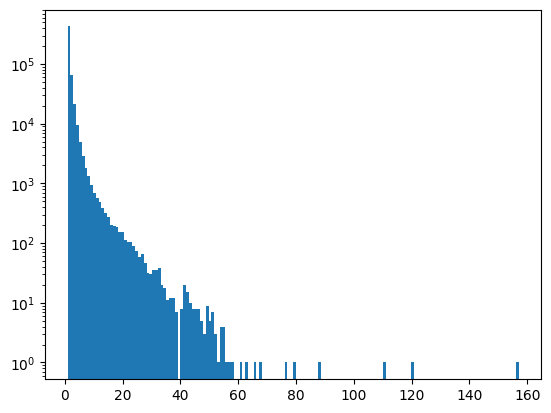

In [17]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [18]:
df=df.dropna()

In [19]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [23]:
new_df=df.sample(50000)

In [25]:
new_df.duplicated().sum()

0

In [26]:
new_df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [27]:
ques_df=new_df[['question1','question2']]

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
questions=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=4000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [30]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(50000, 8000)

In [31]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
21824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
335472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235135,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
temp_df['is_duplicate']=new_df['is_duplicate']

In [34]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,is_duplicate
21824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
116719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
335472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
137843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235135,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,is_duplicate
21824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
116719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
335472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7573

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.737

add features

In [97]:
new_df1=df.sample(50000,random_state=2)


In [98]:
new_df1.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [99]:
new_df1.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

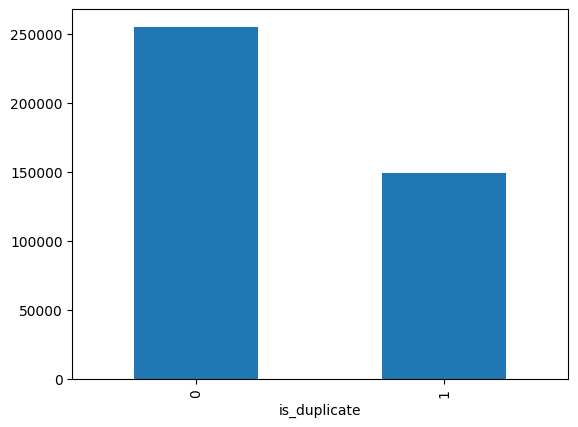

In [100]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [101]:
qid=pd.Series(new_df1['qid1'].tolist()+new_df1['qid2'].tolist())
print('number of unique value',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

number of unique value 88945
Number of questions getting repeated 7384


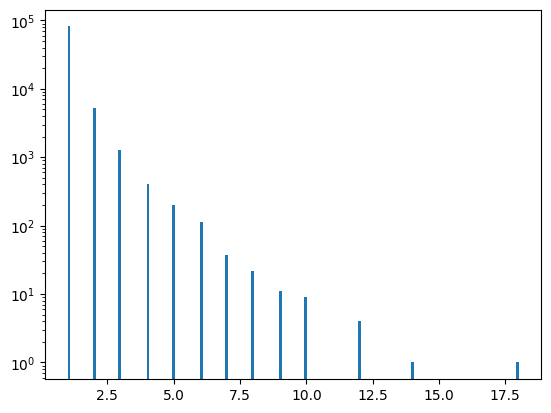

In [102]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [103]:
# feature engineering
new_df1['q1_len']=new_df1['question1'].str.len()
new_df1['q2_len']=new_df1['question2'].str.len()

In [104]:
new_df1.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [105]:
# second feature number of words
new_df1['q1_num_words']=new_df1['question1'].apply(lambda row: len(row.split(" ")))
new_df1['q2_num_words']=new_df1['question2'].apply(lambda row: len(row.split(" ")))

In [106]:
new_df1.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [107]:
# coomon words
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)
     
           

In [108]:
new_df1['word_common']=new_df1.apply(common_words,axis=1)

In [109]:
new_df1

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3
...,...,...,...,...,...,...,...,...,...,...,...
362916,362916,23049,492860,What are some private things you have caught p...,What makes people do evil?,0,58,26,10,5,2
292183,292183,87644,413734,How can I get free gift cards?,How do you return a gift card to get a refund?,0,30,46,7,11,3
360529,360529,161610,490327,Why do people feel pride?,Why do people feel patriotic?,0,25,29,5,5,4
327759,327759,454216,127310,What are the Best tamil books about mahabharat...,What are the best new fiction books in Tamil? ...,0,80,50,12,10,5


In [110]:
# total words
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1)+len(w2))

In [112]:
new_df1['total_words']=new_df1.apply(total_words,axis=1)

In [113]:
new_df1.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [123]:
new_df1['word_share'] = round(new_df1['word_common']/new_df1['total_words'],2)
new_df1.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


minimum 1
maximum 391
average 59.4183


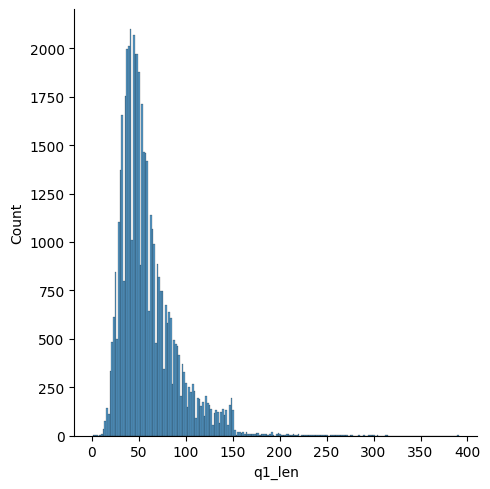

In [114]:
# anlsysis of features
sns.displot(new_df1['q1_len'])
print('minimum',new_df1['q1_len'].min())
print('maximum',new_df1['q1_len'].max())
print('average',new_df1['q1_len'].mean())

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


minimum 6
maximum 1151
average 60.0878


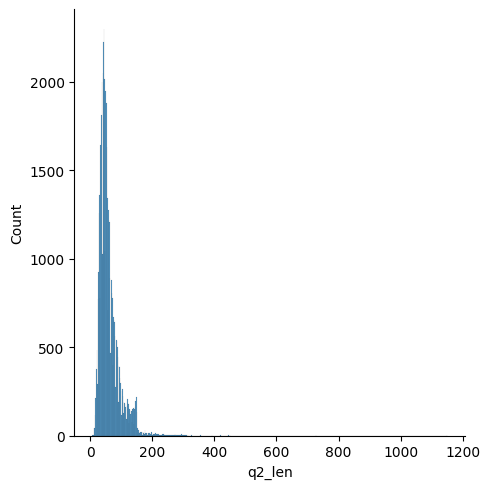

In [115]:
# anlsysis of features
sns.displot(new_df1['q2_len'])
print('minimum',new_df1['q2_len'].min())
print('maximum',new_df1['q2_len'].max())
print('average',new_df1['q2_len'].mean())

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


minimum 1
maximum 72
average 10.93072


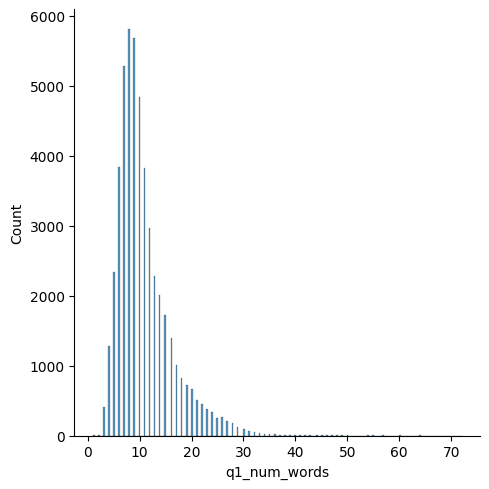

In [116]:
# anlsysis of features
sns.displot(new_df1['q1_num_words'])
print('minimum',new_df1['q1_num_words'].min())
print('maximum',new_df1['q1_num_words'].max())
print('average',new_df1['q1_num_words'].mean())

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


minimum 1
maximum 237
average 11.18904


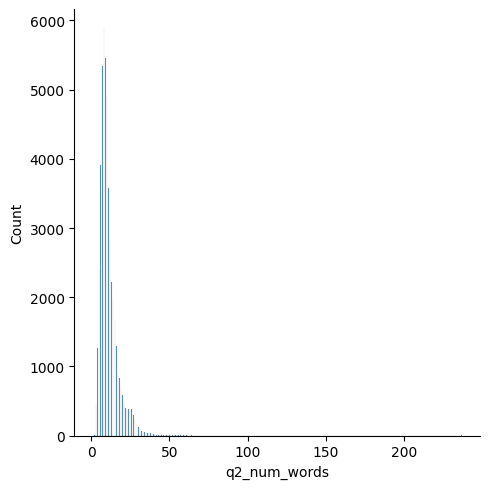

In [117]:
# anlsysis of features
sns.displot(new_df1['q2_num_words'])
print('minimum',new_df1['q2_num_words'].min())
print('maximum',new_df1['q2_num_words'].max())
print('average',new_df1['q2_num_words'].mean())

<ipython-input-121-3c52be5cacef>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df1[new_df1['is_duplicate'] == 0]['word_common'],label='non duplicate')
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-121-3c52be5cacef>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) o

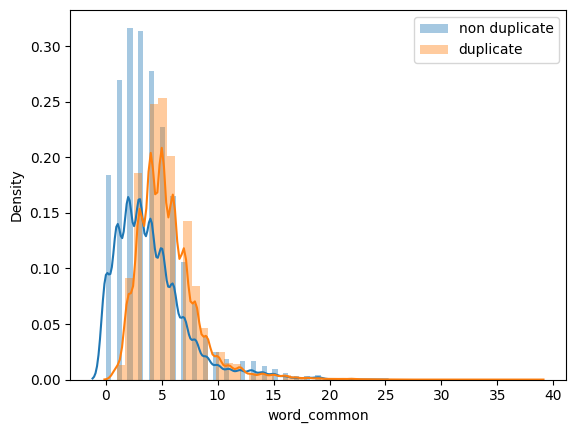

In [121]:
# common words
# common words
sns.distplot(new_df1[new_df1['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df1[new_df1['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

<ipython-input-119-f886c6aff21a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df1[new_df1['is_duplicate'] == 0]['total_words'],label='non duplicate')
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-119-f886c6aff21a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) o

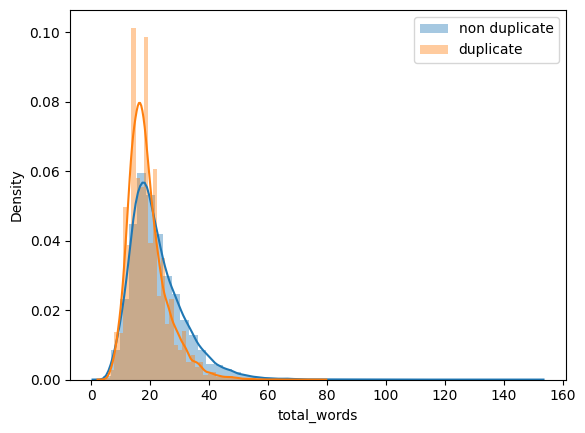

In [119]:
# total words
sns.distplot(new_df1[new_df1['is_duplicate'] == 0]['total_words'],label='non duplicate')
sns.distplot(new_df1[new_df1['is_duplicate'] == 1]['total_words'],label='duplicate')
plt.legend()
plt.show()

In [122]:
new_df1

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...
362916,362916,23049,492860,What are some private things you have caught p...,What makes people do evil?,0,58,26,10,5,2,15
292183,292183,87644,413734,How can I get free gift cards?,How do you return a gift card to get a refund?,0,30,46,7,11,3,17
360529,360529,161610,490327,Why do people feel pride?,Why do people feel patriotic?,0,25,29,5,5,4,10
327759,327759,454216,127310,What are the Best tamil books about mahabharat...,What are the best new fiction books in Tamil? ...,0,80,50,12,10,5,22


<ipython-input-124-6c7ff8d273fd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df1[new_df1['is_duplicate'] == 0]['word_share'],label='non duplicate')
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-124-6c7ff8d273fd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or

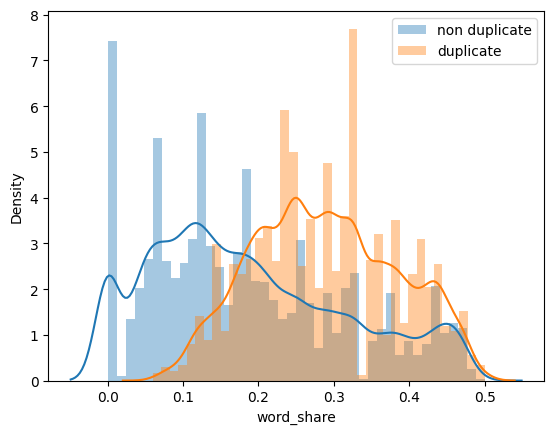

In [124]:
# word share
sns.distplot(new_df1[new_df1['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df1[new_df1['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [125]:
ques_df=new_df1[['question1','question2']]


In [126]:
final_df = new_df1.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(50000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


In [133]:
from sklearn.feature_extraction.text import CountVectorizer
questions=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [134]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(50000, 6000)

In [135]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)

(50000, 14008)


In [136]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,1,0,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)


In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7686

In [140]:

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7706